# SQL Homework - Employee Database: A Mystery in Two Parts
## Bonus (Optional)    

As you examine the data, you are overcome with a creeping suspicion that the dataset is fake. You surmise that your boss handed you spurious data in order to test the data engineering skills of a new employee. To confirm your hunch, you decide to take the following steps to generate a visualization of the data, with which you will confront your boss:

###### 1. Import the SQL database into Pandas. (Yes, you could read the CSVs directly in Pandas, but you are, after all, trying to prove your technical mettle.) This step may require some research. Feel free to use the code below to get started. Be sure to make any necessary modifications for your username, password, host, port, and database name:

*a. from sqlalchemy import create_engine*

*b. engine = create_engine('postgresql://localhost:5432/<your_db_name>')*

*c. connection = engine.connect()*

###### 2. Create a histogram to visualize the most common salary ranges for employees.
###### 3. Create a bar chart of average salary by title.


In [1]:
# 1 Import SQL DB
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import SQLAlchemy dependencies for DBAPI connection 
from sqlalchemy import create_engine

# Set connection for url
from url_keys import dialect, driver, username, password, localhost, database
url = f"{dialect}+{driver}://{username}:{password}@{localhost}/{database}"
      
# Create engine as starting point for SQLAlchemy
engine = create_engine(url)

# Setup connection to the DB 
engine_connection = engine.connect()

In [2]:
# 2. Create a histogram to visualize the most common salary ranges for employees
# Read salaries from sql for histogram
salaries = pd.read_sql("SELECT * FROM salaries", engine_connection)
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [3]:
# Create DataFrame for plot
employees_salaries = salaries[['emp_no','salary']]
employees_salaries = employees_salaries.rename(columns={'emp_no': 'Employees','salary':'Salary'})
employees_salaries.head()

,Employees,Salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [4]:
# Group salary by count of employees
group_salary = employees_salaries.groupby("Salary").count()
group_salary = group_salary.reset_index()
group_salary

,Salary,Employees
0,40000,95346
1,40001,5
2,40002,10
3,40003,9
4,40004,9
...,...,...
50350,125469,1
50351,126703,1
50352,127041,1
50353,127238,1


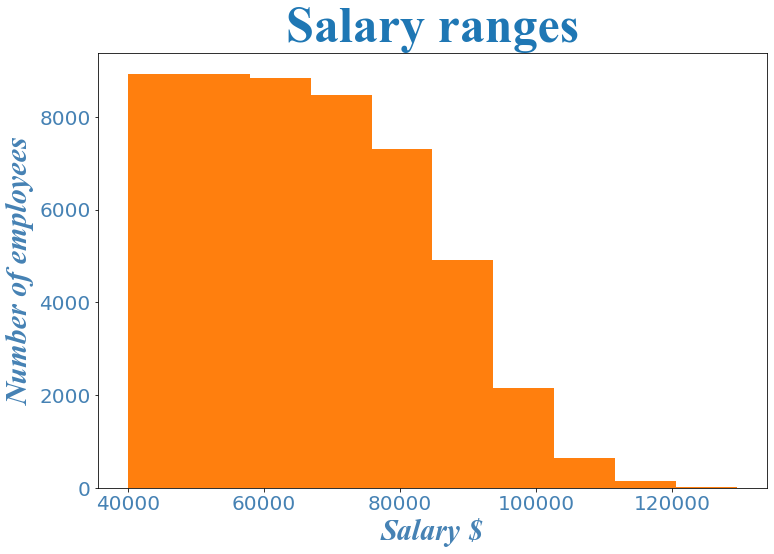

In [5]:
# Plot histogram to visualize salary ranges for employees
group_salary.plot(kind='hist',x='Employees',figsize=(12,8),color='tab:orange',legend=False)
plt.title('Salary ranges',fontsize=50,color='tab:blue', family='Times New Roman')
plt.xlabel('Salary $',style='italic',color='steelblue',family='Times New Roman',fontsize=30)
plt.ylabel('Number of employees',style='italic',color='steelblue',family='Times New Roman',fontsize=30)
plt.xticks(color='steelblue',fontsize=20)
plt.yticks(color='steelblue',fontsize=20)
plt.savefig('Salary_ranges.png')
plt.show()

In [6]:
# Read titles from sql for bar chart
titles = pd.read_sql("SELECT * FROM titles", engine_connection)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [7]:
# Merge tables for the analysis
salary_employee = pd.merge(salaries,titles, on='emp_no',how='inner')
salary_employee

,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...
443303,499997,49597,1987-08-30,1988-08-29,Engineer,1987-08-30,1992-08-29
443304,499997,49597,1987-08-30,1988-08-29,Senior Engineer,1992-08-29,9999-01-01
443305,499998,40000,1993-12-27,1994-12-27,Senior Staff,1998-12-27,9999-01-01
443306,499998,40000,1993-12-27,1994-12-27,Staff,1993-12-27,1998-12-27


In [8]:
# Group by title with average salary
avg_salary = salary_employee.groupby("title").mean()
average_salary = avg_salary.drop(columns = 'emp_no')
average_salary = average_salary.reset_index()
average_salary = average_salary.rename(columns={'title': 'Title','salary':'Salary'})
average_salary

,Title,Salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


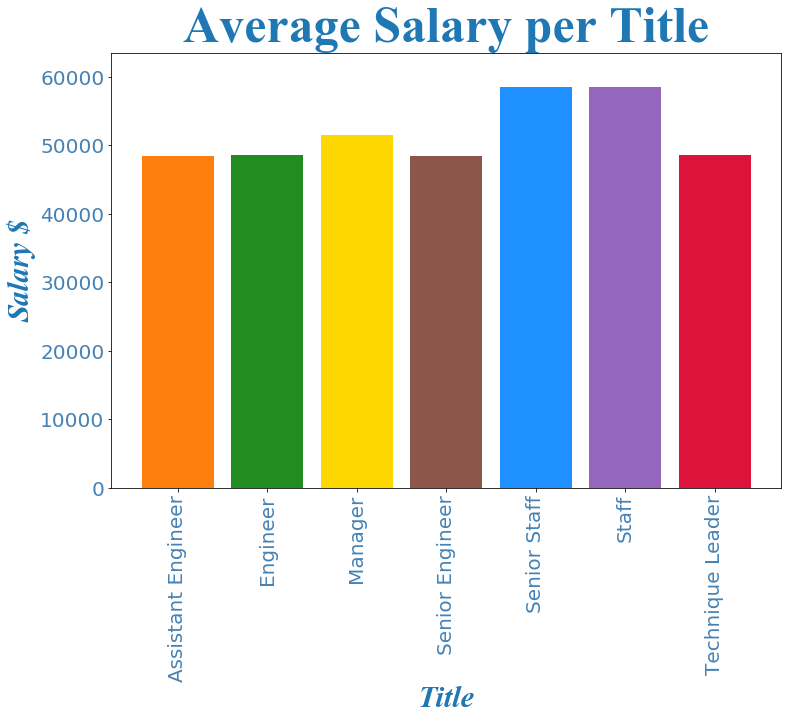

In [9]:
# Plot bar chart 
colors = ['tab:orange','forestgreen','gold','tab:brown','dodgerblue','tab:purple','crimson']
x_axis = average_salary['Title']
y_axis = average_salary['Salary']
ticks = np.arange(len(x_axis))
plt.figure(figsize=(12,8))
plt.bar(x_axis,y_axis,color=colors, align='center',width=0.8)
plt.xlabel('Title',style='italic',color='tab:blue',family='Times New Roman',fontsize=30)
plt.ylabel('Salary $',style='italic',color='tab:blue',family='Times New Roman',fontsize=30)
plt.ylim(0, max(y_axis)+5000)
plt.title('Average Salary per Title',fontsize=50,color='tab:blue', family='Times New Roman')
plt.xticks(ticks, x_axis,rotation='vertical',color='steelblue',fontsize=20)
plt.yticks(color='steelblue',fontsize=20)
plt.savefig('Average_salary_per_title.png')
plt.show()